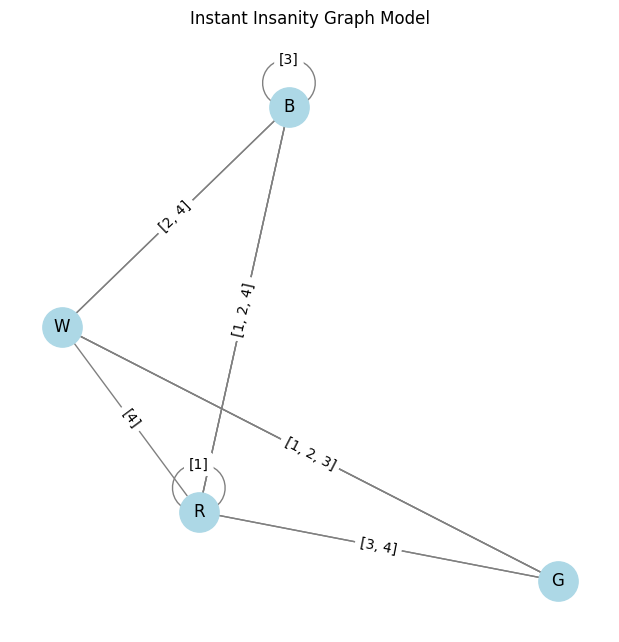

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

edges_with_dice = [
    ('W', 'W', []),
    ('W', 'R', [4]),
    ('W', 'G', [1, 2, 3]),
    ('W', 'B', [2, 4]),


    ('R', 'R', [1]),
    ('R', 'G', [3, 4]),
    ('R', 'B', [1, 2, 4]),

    ('G', 'G', []),
    ('G', 'B', []),

    ('B', 'B', [3]),
]

def instant_insanity_graph():
    # 색상 노드 정의 (이미지와 동일하게)
    color_nodes = ['B', 'G', 'R', 'W']
    
    # G는 MultiGraph로 구성 (동일 색쌍이 여러 주사위에서 나올 수 있음)
    G = nx.MultiGraph()
    G.add_nodes_from(color_nodes)


    
    # 엣지 추가
    for c1, c2, dice_nums in edges_with_dice:
        for die in dice_nums:
            G.add_edge(c1, c2, key=die, label=str(dice_nums))

    # 시각화
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, edge_color='gray')
    
    # 엣지 라벨 표시 (주사위 번호)
    edge_labels = {(u, v, k): d['label'] for u, v, k, d in G.edges(keys=True, data=True)}
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Instant Insanity Graph Model")
    plt.show()
    
    return G

graph = instant_insanity_graph()


W
W
R
R
R
B
W
W
W
R
R
W
R


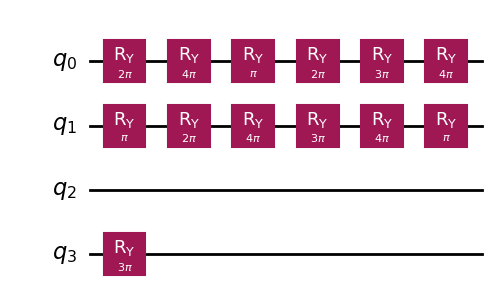

In [16]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RYGate
import numpy as np

def color_to_num(color):
    # 이진 매핑 (임의 선택)
    mapping = {'W': 0, 'R': 1, 'G': 2, 'B': 3}
    return mapping[color]

def custom_sort(u, v):
    return (u, v) if color_to_num(u) <= color_to_num(v) else (v, u)

def encoding(G):
    qc = QuantumCircuit(4, name="InstantInsanityAnsatz")  # 4 qubits for 4 colors
    for color1, color2, cube, label in G.edges(keys=True, data=True):
        (color1, color2) = custom_sort(color1, color2)
        theta = np.pi*cube
        print(color1)
        qc.ry(theta, color_to_num(color1))
    return qc


# 기존 그래프 사용
qc = encoding(G)
qc.draw('mpl')


In [24]:
from qiskit_optimization import QuadraticProgram

qp = QuadraticProgram("const_1")
variables = {}

for g in ['g1', 'g2']:
    for i in edges_with_dice:
        for j in i[2]:
            var = f"{(g, (i[0], i[1]), j)}"
            qp.binary_var(var)
            variables[(g, (i[0], i[1]), j)] = var